<a href="https://colab.research.google.com/github/kine6c/projet-1/blob/main/Analyse_de_sentiment_Tweet_Companie_americaine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Importation des packages



In [1]:
# importer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Telechargement des bibliotheques

In [2]:
# Telechargement des bibliotheques python
!pip install nltk textblob spacy pandas
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# installation de TextBlob et ses outils
!pip install textblob
!pip install nltk textblob
!pip install spacytextblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.5/636.5 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1


#  Charger les donnees

In [4]:
# importer les donnees
data = pd.read_csv('/content/Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#  Analyse des donnees

In [5]:
# analyse statistique  des  donnees
data.describe(include='all')


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
# La distribution de la variable airline_sentiment

sentiment_counts = data['airline_sentiment'].value_counts()
print(sentiment_counts)

data.shape

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


(14640, 15)

#Pretraitement des donnees

#  Charge le modèle de langue anglais de SpaCy.
Crée une instance de SpacyTextBlob en utilisant le modèle SpaCy.
Charger les données de tweets
Fonction pour obtenir le sentiment à l'aide de SpaCyTextBlob.
Analyse le texte avec le modèle SpaCy.
Récupère le score de polarité (sentiment) calculé par SpacyTextBlob.
Calcul et affichage des sentiments

In [7]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Télécharger les stop words et tokenizer de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Charger le modèle SpaCy
nlp = spacy.load('en_core_web_sm')


# Fonction de prétraitement des tweets
def preprocess_tweet(tweet):
    # Enlever les URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Enlever les mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Enlever les caractères spéciaux
    tweet = re.sub(r'[^A-Za-z0-9\s]+', '', tweet)
    # Mettre en minuscule
    tweet = tweet.lower()
    # Tokenisation
    tokens = word_tokenize(tweet)
    # Enlever les stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)



# Prétraiter les tweets
data['cleaned_text'] = data['text'].apply(preprocess_tweet)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Analyse de sentiments

In [8]:
# Ajouter SpacyTextBlob au pipeline SpaCy
spacy_text_blob = SpacyTextBlob(nlp)
nlp.add_pipe('spacytextblob')

# Fonction pour obtenir le sentiment à l'aide de SpaCyTextBlob
def get_spacy_sentiment(text):
    doc = nlp(text)
    return doc._.polarity

# Calculer les sentiments
data['sentiment'] = data['cleaned_text'].apply(get_spacy_sentiment)

# Afficher les premiers résultats
print(data[['text', 'cleaned_text', 'sentiment']])


                                                    text  \
0                    @VirginAmerica What @dhepburn said.   
1      @VirginAmerica plus you've added commercials t...   
2      @VirginAmerica I didn't today... Must mean I n...   
3      @VirginAmerica it's really aggressive to blast...   
4      @VirginAmerica and it's a really big bad thing...   
...                                                  ...   
14635  @AmericanAir thank you we got on a different f...   
14636  @AmericanAir leaving over 20 minutes Late Flig...   
14637  @AmericanAir Please bring American Airlines to...   
14638  @AmericanAir you have my money, you change my ...   
14639  @AmericanAir we have 8 ppl so we need 2 know h...   

                                            cleaned_text  sentiment  
0                                                   said   0.000000  
1          plus youve added commercials experience tacky   0.000000  
2           didnt today must mean need take another trip  -0.312500  

In [9]:
# Afficher le dataframe ab=vec la colonne cleaned_text ,la colonne nettoyer tweet
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said,0.000000
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus youve added commercials experience tacky,0.000000
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),didnt today must mean need take another trip,-0.312500
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,0.006250
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing,-0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,thank got different flight chicago,0.000000
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,leaving 20 minutes late flight warnings commun...,-0.300000
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,please bring american airlines blackberry10,0.000000
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),money change flight dont answer phones suggest...,0.000000


#  Visualisation des resultats

#  Distribution des Sentiments des Tweets par rapport au core de Sentiment


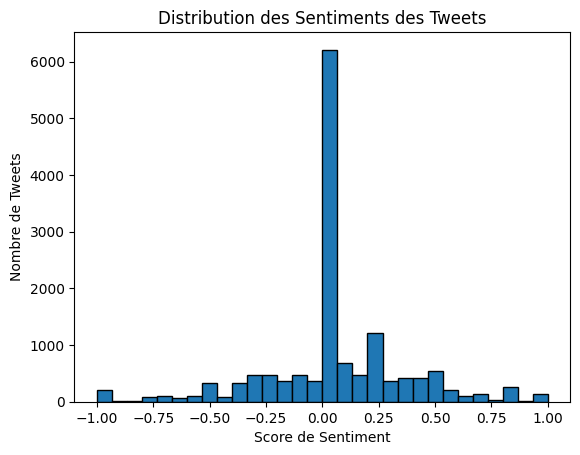

In [25]:
# Créer un histogramme des sentiments

plt.hist(data['sentiment'], bins=30, edgecolor='black')
plt.title('Distribution des Sentiments des Tweets')
plt.xlabel('Score de Sentiment')
plt.ylabel('Nombre de Tweets')
plt.show()




airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


<ipython-input-10-bbf324cf0131>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


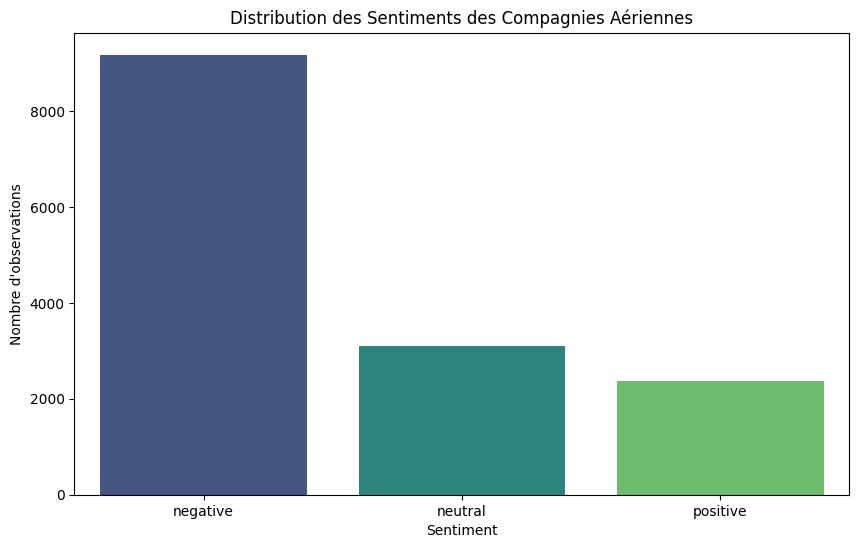

In [10]:
#pas utiliser
# Représenter de la distribution de la variable airline_sentiment

sentiment_counts = data['airline_sentiment'].value_counts()
print(sentiment_counts)

#  Créer une figure
plt.figure(figsize=(10, 6))

# Tracer un graphique à barre
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Ajouter des labels et un titre
plt.xlabel('Sentiment')
plt.ylabel('Nombre d\'observations')
plt.title('Distribution des Sentiments des Compagnies Aériennes')

# Afficher le graphique
plt.show()

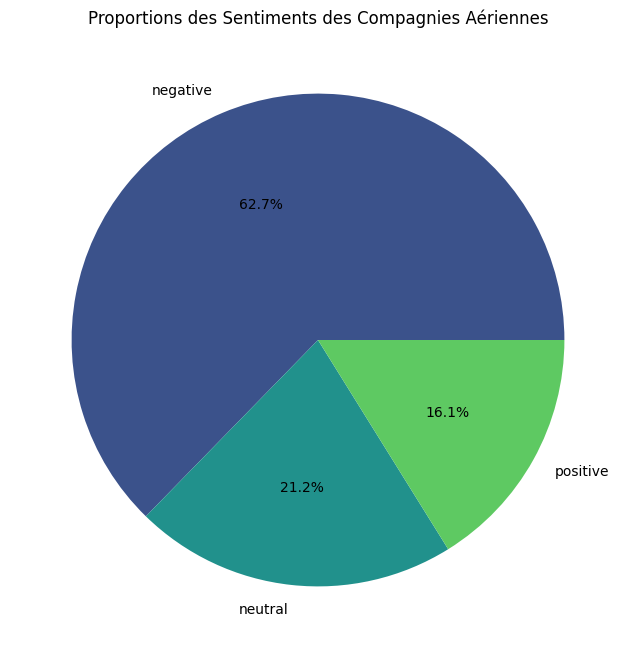

In [11]:
# Un graphique circulaire de la variable airline_sentiment avec les proportion des catégories

sentiment_counts = data['airline_sentiment'].value_counts()

plt.figure(figsize=(8, 8))

# Tracer un graphique circulaire
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=len(sentiment_counts)))

# Ajouter un titre
plt.title('Proportions des Sentiments des Compagnies Aériennes')

# Afficher le graphique
plt.show()


<ipython-input-12-535e35d575e3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_counts.index, y=airline_counts.values, palette='viridis')


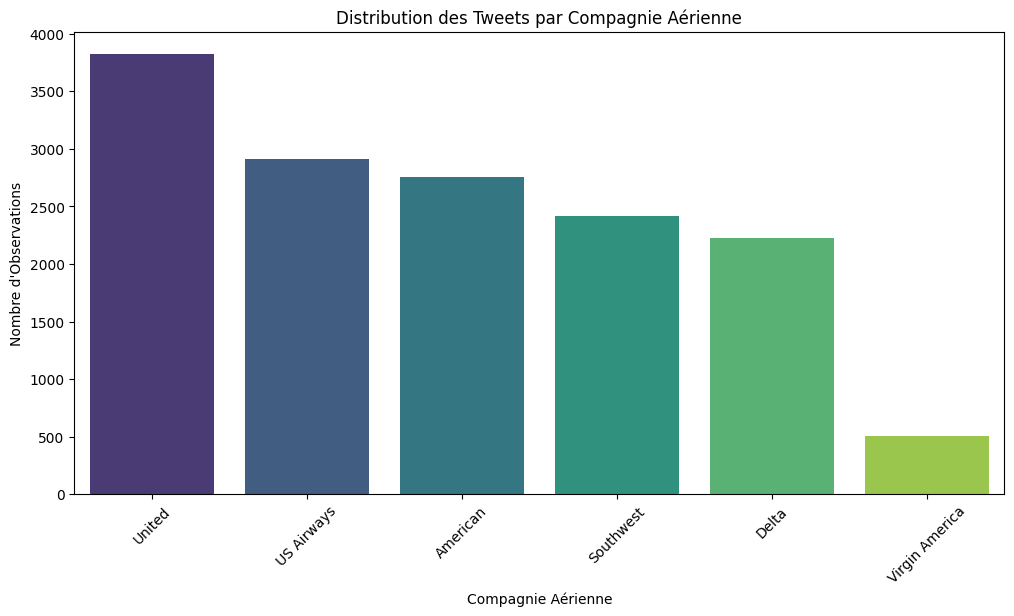

In [12]:
#pas utiliser
# Variables Catégorielles du dataset
# Distribution des Tweets par Compagnie Aérienne
#  La répartition des tweets par compagnie aérienne.
# Compter les occurrences de chaque compagnie aérienne

airline_counts = data['airline'].value_counts()

# Créer une figure
plt.figure(figsize=(12, 6))

# Tracer un graphique à barres
sns.barplot(x=airline_counts.index, y=airline_counts.values, palette='viridis')

# Ajouter des labels et un titre
plt.xlabel('Compagnie Aérienne')
plt.ylabel('Nombre d\'Observations')
plt.title('Distribution des Tweets par Compagnie Aérienne')

# Afficher le graphique
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-5d155228427f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline', y='sentiment', data=average_sentiments, palette='viridis')


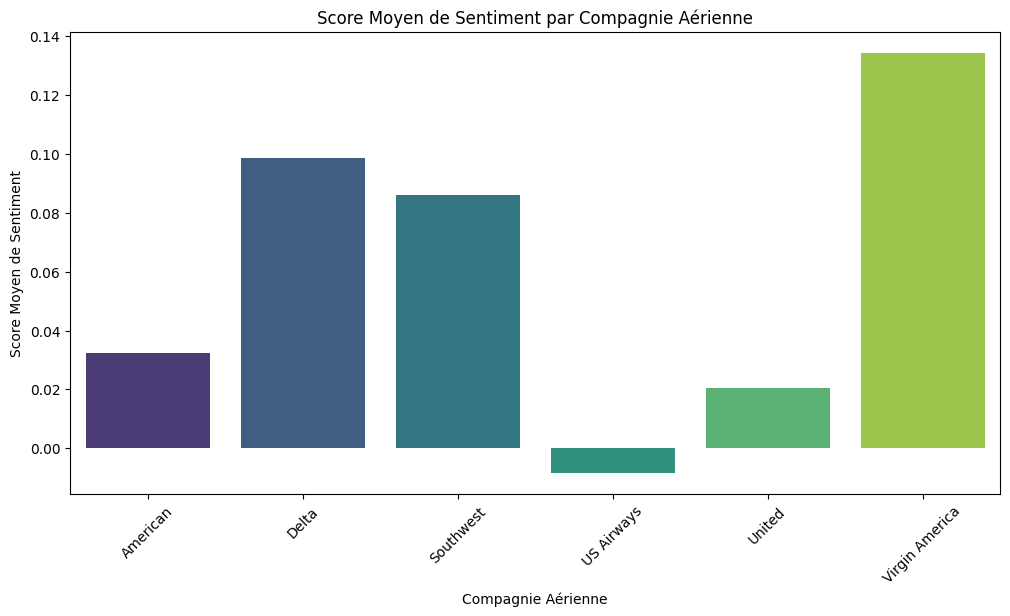

In [13]:
# Représentation des Compagnies Aériennes par Rapport au Score de Sentiment

# Calculer le score moyen de sentiment pour chaque compagnie aérienne
average_sentiments = data.groupby('airline')['sentiment'].mean().reset_index()

# Créer une figure
plt.figure(figsize=(12, 6))

# Tracer un graphique à barres pour la moyenne des sentiments par compagnie aérienne
sns.barplot(x='airline', y='sentiment', data=average_sentiments, palette='viridis')

# Ajouter des labels et un titre
plt.xlabel('Compagnie Aérienne')
plt.ylabel('Score Moyen de Sentiment')
plt.title('Score Moyen de Sentiment par Compagnie Aérienne')

# Afficher le graphique
plt.xticks(rotation=45)
plt.show()


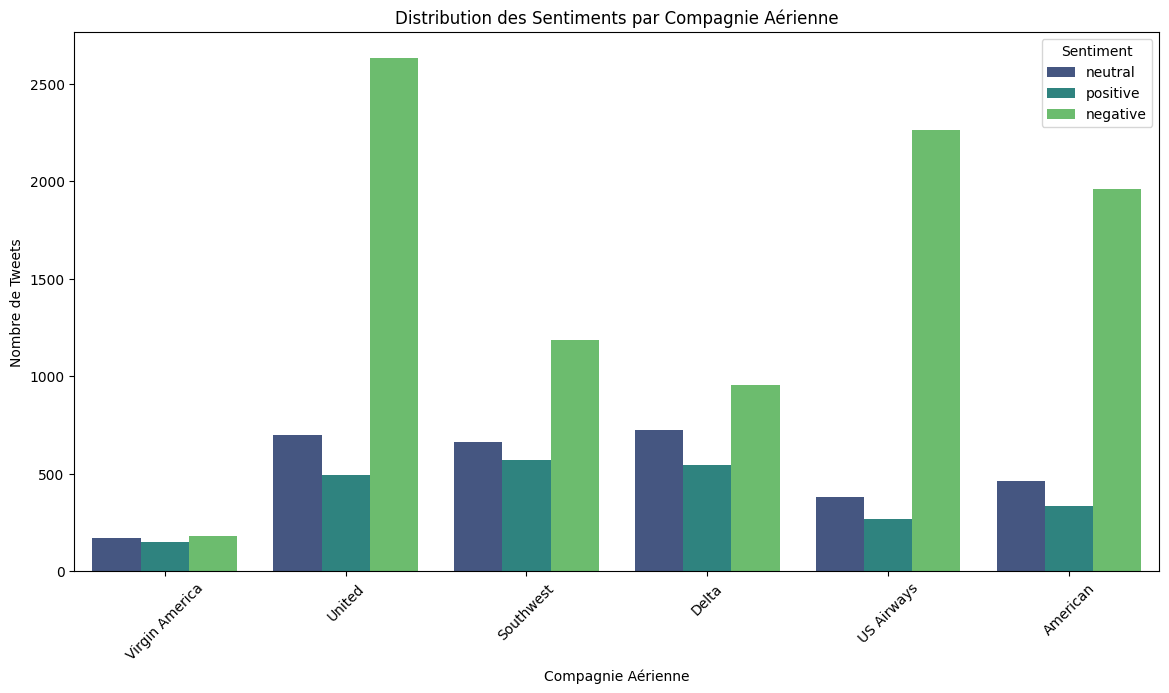

In [14]:
#pas utiliser
# Représentation des Compagnies Aériennes par Rapport au airline_sentiment

# Créer une figure
plt.figure(figsize=(14, 7))

# Tracer un graphique de comptage des sentiments par compagnie aérienne
sns.countplot(data=data, x='airline', hue='airline_sentiment', palette='viridis')

# Ajouter des labels et un titre
plt.xlabel('Compagnie Aérienne')
plt.ylabel('Nombre de Tweets')
plt.title('Distribution des Sentiments par Compagnie Aérienne')

# Afficher le graphique
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


<ipython-input-15-2dcdac956434>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negativereason_counts.index, y=negativereason_counts.values, palette='viridis')


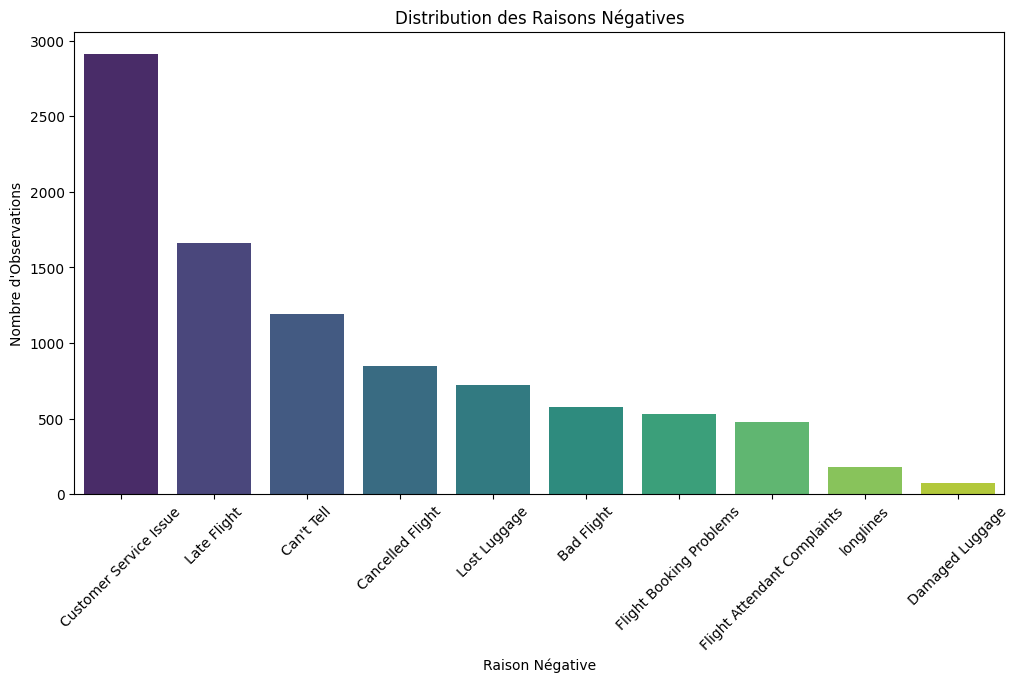

In [15]:
#pas utiliser
# Pour visualiser les raisons de sentiment négatif.
# Compter les occurrences de chaque raison négative
negativereason_counts = data['negativereason'].value_counts()

# Créer une figure
plt.figure(figsize=(12, 6))

# Tracer un graphique à barres
sns.barplot(x=negativereason_counts.index, y=negativereason_counts.values, palette='viridis')

# Ajouter des labels et un titre
plt.xlabel('Raison Négative')
plt.ylabel('Nombre d\'Observations')
plt.title('Distribution des Raisons Négatives')

# Afficher le graphique
plt.xticks(rotation=45)
plt.show()


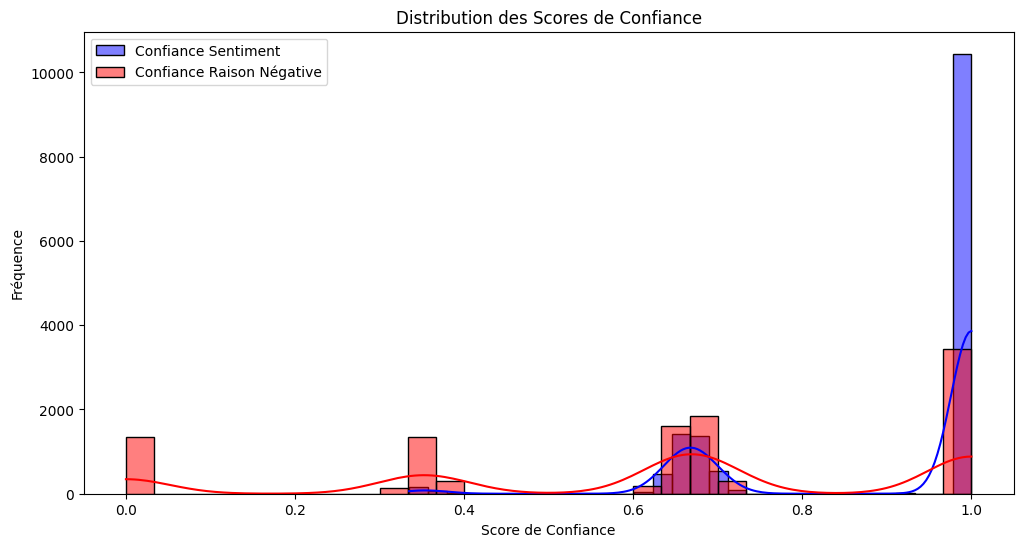

In [16]:
#pas utiliser
# Variables Numériques
# Pour visualiser la distribution des scores de confiance.

# Créer une figure
plt.figure(figsize=(12, 6))

# Tracer des histogrammes pour les scores de confiance
sns.histplot(data['airline_sentiment_confidence'], bins=30, kde=True, color='blue', label='Confiance Sentiment')
sns.histplot(data['negativereason_confidence'], bins=30, kde=True, color='red', label='Confiance Raison Négative')

# Ajouter des labels et un titre
plt.xlabel('Score de Confiance')
plt.ylabel('Fréquence')
plt.title('Distribution des Scores de Confiance')
plt.legend()

# Afficher le graphique
plt.show()
